# Module 3, Lesson 1: Models of amino acid replacement

## Empirical models

## Guided exercise 

Summarize protein alignment from 13 mitochondrial proteins of human and chimp, gaps removed.


In [34]:
from Bio import SeqIO
import pandas as pd
import numpy as np

in_seq_handle = open("../../data/mito.pep")
seq_dict = SeqIO.to_dict(SeqIO.parse(in_seq_handle, "fasta"))
in_seq_handle.close()

amino_acids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
# print(amino_acid_matrix)
def calcDistMatrix(s1,s2):
    
    amino_acid_matrix = {}
    for i in amino_acids:
        for j in amino_acids:
            if i not in amino_acid_matrix:
                amino_acid_matrix[i] = {}
            if j not in amino_acid_matrix[i]:
                amino_acid_matrix[i][j] = 0
    for i in range(len(s1)):
        aa1 = s1[i]
        aa2 = s2[i]
        
        amino_acid_matrix[aa1][aa2] += 1
        amino_acid_matrix[aa2][aa1] += 1
    return pd.DataFrame.from_dict(amino_acid_matrix)

human = seq_dict["human"].seq
chimp = seq_dict["chimp"].seq
print(calcDistMatrix(human,chimp))


    

     A    R    N    D   C    Q    E    G    H    I     L    K    M    F    P  \
A  428    0    0    0   0    0    0    1    0    5     0    0    3    0    0   
R    0  116    0    0   0    0    0    0    1    0     0    0    0    0    0   
N    0    0  300    2   0    0    0    0    0    0     0    0    0    0    0   
D    0    0    2  122   0    0    0    1    0    0     0    0    0    0    0   
C    0    0    0    0  38    0    0    0    0    0     0    0    0    0    0   
Q    0    0    0    0   0  162    0    0    1    0     0    1    0    0    0   
E    0    0    0    0   0    0  160    1    0    0     0    1    0    0    0   
G    1    0    0    1   0    0    1  382    0    0     0    0    0    0    0   
H    0    1    0    0   0    1    0    0  148    0     2    0    0    0    0   
I    5    0    0    0   0    0    0    0    0  566     2    0    0    0    0   
L    0    0    0    0   0    0    0    0    2    2  1204    0    2    6    1   
K    0    0    0    0   0    1    1    0

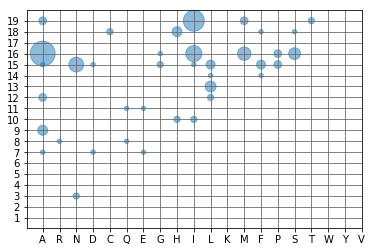

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
def bubblePlotMatrix(inMatrix):
    x = []
    y = []
    z = []
    xy = {}
    for i in range(len(amino_acids)):
        for j in range(len(amino_acids)):
            if i != j:
                left = sorted((i,j))[0]
                right = sorted((i,j))[1]
                xy[(left,right)] = True
    for pair in xy:
        x.append(pair[0])
        y.append(pair[1])
        aaTo = amino_acids[pair[0]]
        aaFrom = amino_acids[pair[1]]        
        z.append(inMatrix[aaTo][aaFrom])
    return x,y,np.array(z)
    
                

distMat = calcDistMatrix(human,chimp)
x,y,bubblesize = bubblePlotMatrix(distMat) 

# print(bubblePlotMatrix(calcDistMatrix(human,chimp)))
plt.scatter(x, y, s=bubblesize*20, alpha=0.5)
plt.locator_params(nbins=20)
plt.xticks(range(20), amino_acids)
# plt.yticks(range(20), amino_acids)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

        

## other models

mtMAM

mtREV24

mtMet

mtArt



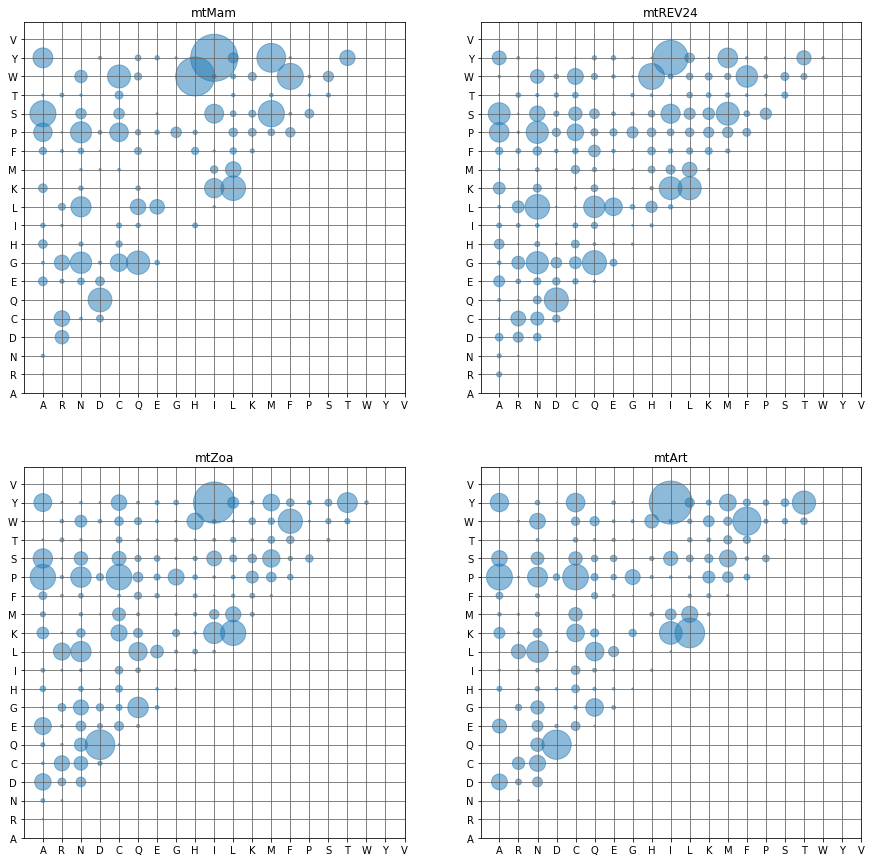

In [71]:
%matplotlib inline
mtMam = pd.read_csv("../../data/aa_models/mtMam.csv",index_col=0)
mtREV24 = pd.read_csv("../../data/aa_models/mtREV24.csv",index_col=0)
mtZoa = pd.read_csv("../../data/aa_models/mtZoa.csv",index_col=0)
mtArt = pd.read_csv("../../data/aa_models/mtArt.csv",index_col=0)
# print(mtMam)
mtMamx,mtMamy,mtMambubblesize = bubblePlotMatrix(mtMam)
mtREV24x,mtREV24y,mtREV24bubblesize = bubblePlotMatrix(mtREV24)
mtZoax,mtZoay,mtZoabubblesize = bubblePlotMatrix(mtZoa)
mtArtx,mtArty,mtArtbubblesize = bubblePlotMatrix(mtArt)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.scatter(mtMamx,mtMamy, s=mtMambubblesize,alpha=0.5)
ax1.set_title('mtMam')
ax2.scatter(mtREV24x,mtREV24y, s=mtREV24bubblesize,alpha=0.5)
ax2.set_title('mtREV24')
ax3.scatter(mtZoax,mtZoay, s=mtZoabubblesize,alpha=0.5)
ax3.set_title('mtZoa')
ax4.scatter(mtArtx,mtArty, s=mtArtbubblesize,alpha=0.5)
ax4.set_title('mtArt')

for ax in fig.get_axes():
    ax.locator_params(nbins=20)
    ax.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.sca(ax)
    plt.xticks(range(20), amino_acids)
    plt.yticks(range(20), amino_acids)
    
fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()

## On your own

Create a function to calculate the mean number of nucleotide changes required to exchange each amino acid (ranges from 1 to 3) using the vertebrate mitochondrial codon table.
Determine if their is a correlation between those distances and the exhangability values in the given matrices.